In [22]:
import pandas as pd
import numpy as np
import nltk
from nltk import word_tokenize
import textstat

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [32]:
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
def get_tags(text: str) -> dict:
    tokens = word_tokenize(text)
    sentence_tagged = nltk.pos_tag(tokens, tagset='universal')
    tag_fd = nltk.FreqDist(tag for (word, tag) in sentence_tagged)
    tags = dict(tag_fd)
    return tags

def number_of_words(tags: dict) -> int:
    sum = np.sum(list(tags.values()))
    if '.' in tags:
        sum -= tags['.']
    return sum

def readability(text: str) -> float:
    return textstat.flesch_reading_ease(text)

def noun_verb_ratio(tags: dict):
    sum = np.sum(list(tags.values()))
    if 'NOUN' in tags:
        noun_ratio = tags['NOUN'] / sum
    else:
        noun_ratio = 0
    if 'VERB' in tags:
        verb_ratio = tags['VERB'] / sum
    else:
        verb_ratio = 0
    
    return noun_ratio, verb_ratio

def score(noun_ratio, verb_ratio):
    targets = {'noun': 0.3, 'verb': 0.2}
    factors = {'noun': 1/(1 - targets['noun']), 'verb':1/(1 - targets['verb'])}

    noun_score = 1-abs(noun_ratio-targets['noun']) * factors['noun']
    verb_score = 1-abs(verb_ratio-targets['verb']) * factors['verb']

    return noun_score, verb_score

def mean_score(noun_score, verb_score, r_ratio):
    return (noun_score + verb_score + r_ratio) / 3

def total_score(mean_score, amount_of_words):
    if amount_of_words < 20:
        return mean_score * (100 - (20 - amount_of_words) * 5) / 100        
    return mean_score

In [30]:
def calculate_score(text: str) -> float:
    punctuation= '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    for char in punctuation:
        text = text.replace(char, '')
    tags = get_tags(text)
    n_words = number_of_words(tags)

    r = readability(text)
    r_ratio = r / 100
    
    noun_ratio, verb_ratio = noun_verb_ratio(tags)
    noun_score, verb_score = score(noun_ratio, verb_ratio)
    
    m_score = mean_score(noun_score, verb_score, r_ratio)
    final_score = total_score(m_score, n_words)
    return {'final_score': final_score, 'noun_score': noun_score, 'verb_score': verb_score, 'readability': r_ratio}


In [31]:
input_text = '''Dear Team Would you please check with below SO#?SO#I'm trying to create OD(vla) but it can not aligned Batch. Please check with this SO and let me know this issue. Thanks.[Portal search term: SAP issue]'''
calculate_score(input_text)

{'final_score': 0.8560714285714285,
 'noun_score': 0.8571428571428571,
 'verb_score': 0.9285714285714286,
 'readability': 0.7825}

In [37]:
x = {'final_score': 0.8560714285714285,
 'noun_score': 0.8571428571428571,
 'verb_score': 0.9285714285714286,
 'readability': 0.7825}

In [38]:
y = list(x.values())
y

[0.8560714285714285, 0.8571428571428571, 0.9285714285714286, 0.7825]

In [30]:
str(y).strip('[]').split(', ')

['0.8560714285714285', '0.8571428571428571', '0.9285714285714286', '0.7825']

#####################################333333333

In [21]:
import spacy
import spacy.cli
from scipy import spatial
spacy.cli.download("en_core_web_md")
nlp = spacy.load('en_core_web_md')

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [34]:
m = "0.8560714285714285, 0.8571428571428571, 0.9285714285714286, 0.7825"
a,b,c,d = m.split(', ')

In [35]:
a

'0.8560714285714285'

In [40]:
df = pd.DataFrame([y], columns=['final_score', "noun_score", "verb_score", "readability"])

<AxesSubplot:>

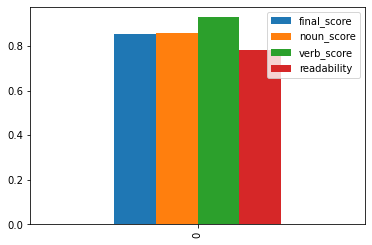

In [43]:
df.plot.bar()